# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#set size small for initial testing(original size = 1500) 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#lists to hold info
city_name = []
lat = []
lng = []
country = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for city in cities:
    try:
        weather_json = requests.get(query_url + city).json()
        country.append(weather_json['sys']['country'])        
        city_name.append(city)
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        date.append(weather_json['dt'])
        print(f'Processing Record {cities.index(city)} | {city}')
    except:
        print("City not found.")
print("-----------------------------")    
print("Retrieval Completed")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | busselton
Processing Record 1 | trelleborg
Processing Record 2 | rikitea
Processing Record 3 | cabo san lucas
Processing Record 4 | qaanaaq
City not found.
Processing Record 6 | saskylakh
Processing Record 7 | shache
Processing Record 8 | sorland
Processing Record 9 | mar del plata
Processing Record 10 | vaini
Processing Record 11 | kapaa
Processing Record 12 | labuhan
Processing Record 13 | bethel
Processing Record 14 | dicabisagan
Processing Record 15 | saint-philippe
Processing Record 16 | eyl
Processing Record 17 | ketchikan
Processing Record 18 | ambilobe
Processing Record 19 | ushuaia
Processing Record 20 | provideniya
Processing Record 21 | cherskiy
Processing Record 22 | arraial do cabo
Processing Record 23 | yellowknife
Processing Record 24 | mayumba
City not found.
Processing Record 26 | deputatskiy
City not found.
Processing Record 28 | mataura
Processing Record 29 | takhtamygda
Processing Record 30

City not found.
Processing Record 264 | altagracia de orituco
Processing Record 265 | kavieng
Processing Record 266 | kruisfontein
Processing Record 267 | xinmin
Processing Record 268 | aklavik
Processing Record 269 | kaitangata
Processing Record 270 | loikaw
City not found.
Processing Record 272 | nangomba
Processing Record 273 | nanakuli
Processing Record 274 | eskisehir
Processing Record 275 | selenginsk
Processing Record 276 | esmeraldas
Processing Record 277 | rancho palos verdes
Processing Record 278 | usinsk
Processing Record 279 | okhotsk
Processing Record 280 | mareeba
Processing Record 281 | kiama
Processing Record 282 | raudeberg
Processing Record 283 | san jose
Processing Record 284 | taltal
Processing Record 285 | muroto
Processing Record 286 | chuguyevka
Processing Record 287 | beloha
Processing Record 288 | bolshaya dzhalga
Processing Record 289 | kayerkan
Processing Record 290 | mosquera
Processing Record 291 | broken hill
Processing Record 292 | lauder
Processing Recor

Processing Record 517 | sompeta
City not found.
Processing Record 519 | terrace
Processing Record 520 | houma
Processing Record 521 | auki
Processing Record 522 | maxixe
City not found.
Processing Record 524 | marzuq
Processing Record 525 | coahuayana
Processing Record 526 | codrington
Processing Record 527 | channel-port aux basques
Processing Record 528 | narrabri
Processing Record 529 | agadez
Processing Record 530 | sobolevo
Processing Record 531 | ayna
Processing Record 532 | simao
Processing Record 533 | walvis bay
Processing Record 534 | cairns
City not found.
Processing Record 536 | aksha
Processing Record 537 | grand gaube
Processing Record 538 | sri aman
Processing Record 539 | ahome
Processing Record 540 | nizhniy tsasuchey
Processing Record 541 | narsaq
Processing Record 542 | verkhnyaya inta
Processing Record 543 | sembe
Processing Record 544 | mombaca
Processing Record 545 | kunya
Processing Record 546 | maniitsoq
Processing Record 547 | la rioja
Processing Record 548 | k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date,
                           "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": temp, "Wind Speed": wind_speed})
weather_df.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [6]:
#Exporting the data to a .csv
weather_df.to_csv(output_data_file)

#Display DF
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,66,AU,1580357043,31,-33.65,115.33,73.99,15.28
1,trelleborg,90,SE,1580357724,93,55.38,13.16,39.99,16.11
2,rikitea,100,PF,1580357724,72,-23.12,-134.97,79.39,6.96
3,cabo san lucas,75,MX,1580357707,59,22.89,-109.91,66.20,4.70
4,qaanaaq,100,GL,1580357706,95,77.48,-69.36,-19.32,1.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

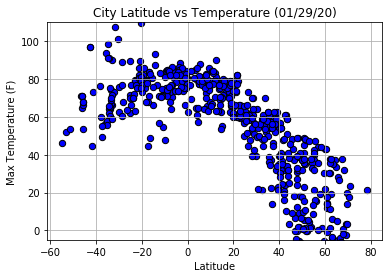

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color = 'b', s=40, edgecolors="black", marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%x")) 
plt.ylim(-5,110)
plt.grid()
plt.savefig("output_data/fig1.jpg")
plt.show()

#### Latitude vs. Humidity Plot

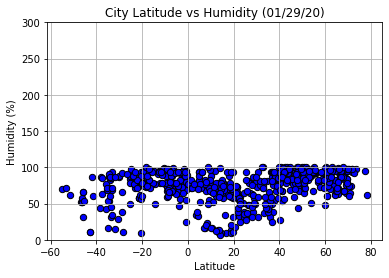

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = 'b', s=40, edgecolors="black", marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x")) 
plt.ylim(0,300)
plt.grid()
plt.savefig("output_data/fig2.jpg")
plt.show()

#### Latitude vs. Cloudiness Plot

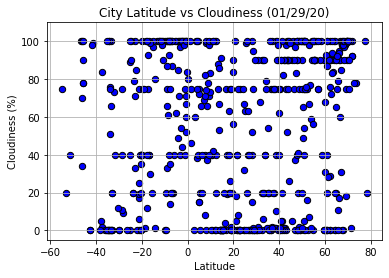

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color = 'b', s=40, edgecolors="black", marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.ylim(-5,110)
plt.grid()
plt.savefig("output_data/fig3.jpg")
plt.show()

#### Latitude vs. Wind Speed Plot

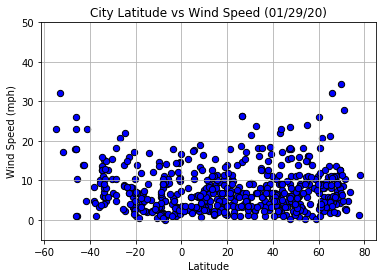

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = 'b',s=40, edgecolors="black", marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x")) 
plt.ylim(-5,50)
plt.grid()
plt.savefig("output_data/fig4.jpg")
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plot(x_value,y_value,pole,x_title,y_title,x_cor,y_cor):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(x_cor,y_cor),fontsize=15,color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    title = pole + "-" + x_title + "Vs" + y_title
    plt.title(title)
    print(f"The r-squared is: {rvalue}")
    save_file = "output_data/" + title + ".jpg"
    plt.savefig(save_file)
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Lat"] >= 0]
south_df = weather_df.loc[weather_df["Lat"] < 0]
#north_df.head()
south_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,66,AU,1580357043,31,-33.65,115.33,73.99,15.28
2,rikitea,100,PF,1580357724,72,-23.12,-134.97,79.39,6.96
8,mar del plata,5,AR,1580357617,87,-38.00,-57.56,60.01,4.70
9,vaini,75,TO,1580357725,79,-21.20,-175.20,86.00,5.82
11,labuhan,100,ID,1580357725,73,-6.88,112.21,85.08,14.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8688669123877136


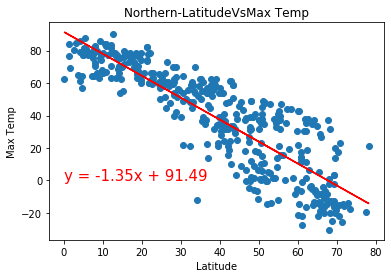

In [29]:
x_value = north_df.iloc[:,5]
y_value = north_df.iloc[:,7]

regression_plot(x_value,y_value,"Northern","Latitude","Max Temp",0,0)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3263735699171453


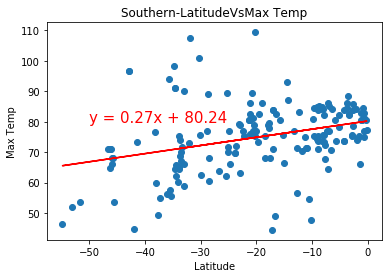

In [30]:
x_value = south_df.iloc[:,5]
y_value = south_df.iloc[:,7]

regression_plot(x_value,y_value,"Southern","Latitude","Max Temp",-50,80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4553638687726707


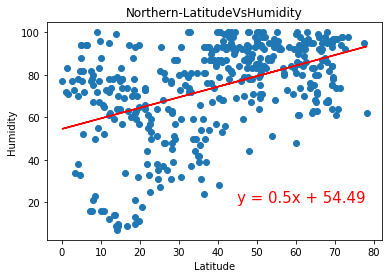

In [31]:
x_value = north_df.iloc[:,5]
y_value = north_df.iloc[:,4]

regression_plot(x_value,y_value,"Northern","Latitude","Humidity",45,20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37516138332781407


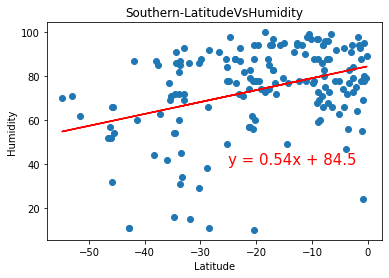

In [32]:
x_value = south_df.iloc[:,5]
y_value = south_df.iloc[:,4]

regression_plot(x_value,y_value,"Southern","Latitude","Humidity",-25,40)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.282903188403906


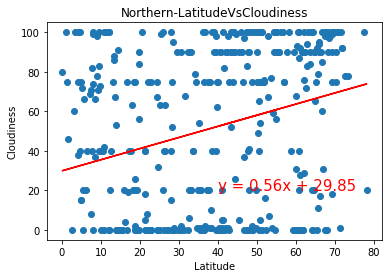

In [33]:
x_value = north_df.iloc[:,5]
y_value = north_df.iloc[:,1]

regression_plot(x_value,y_value,"Northern","Latitude","Cloudiness",40,20)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3301598827761811


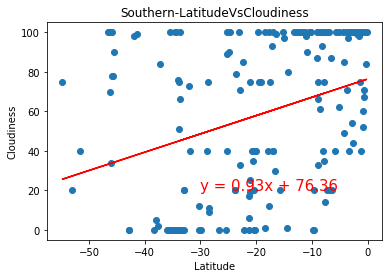

In [34]:
x_value = south_df.iloc[:,5]
y_value = south_df.iloc[:,1]

regression_plot(x_value,y_value,"Southern","Latitude","Cloudiness",-30,20)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1326704561256837


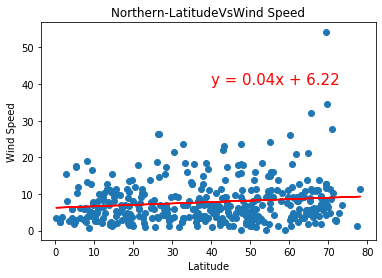

In [35]:
x_value = north_df.iloc[:,5]
y_value = north_df.iloc[:,8]

regression_plot(x_value,y_value,"Northern","Latitude","Wind Speed",40,40)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4017808742749766


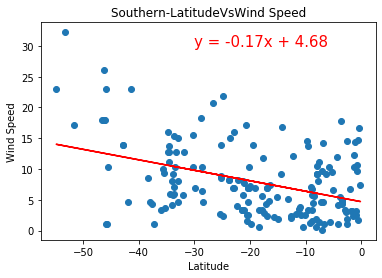

In [36]:
x_value = south_df.iloc[:,5]
y_value = south_df.iloc[:,8]

regression_plot(x_value,y_value,"Southern","Latitude","Wind Speed",-30,30)